# Decision Tree

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

from david.textToSpeech import say

### Import data

In [17]:
X_train_s = np.load('data/X_train_s.npy')
X_test_s = np.load('data/X_test_s.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')

feature_names = np.load('data/feature_names.npy')

### Parameter Optimization

In [ ]:
def calc_params(X, y, clf, param_values, param_name, K, verbose=False):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        
        if (verbose):
            s = "{} {:.3f} train {:.3f} test {:.3f}"
            print(s.format(param_name, param_value, train_scores[i], test_scores[i]))
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")
    plt.grid(True)

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

### max_depth

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

Optimization progress for paramter max_depth (out of 50)
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 Best Score 0.95 at Index  12


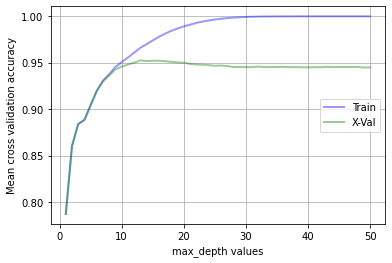

In [9]:
dt = tree.DecisionTreeClassifier()

param_range = range(1,51)

train_scores, test_scores = calc_params(X_train_s, y_train, dt, param_range, 'max_depth', 5)

max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("\nBest Score {:.3f} for parameter value".format(test_scores[max_at]), [*param_range][max_at])

### min_samples_split

The minimum number of samples required to split an internal node:
* If int, then consider min_samples_split as the minimum number.
* If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.


Optimization progress for paramter min_samples_split (out of 50)
min_samples_split 2.000 train 1.000 test 0.945
min_samples_split 3.000 train 0.998 test 0.946
min_samples_split 4.000 train 0.995 test 0.946
min_samples_split 5.000 train 0.993 test 0.947
min_samples_split 6.000 train 0.991 test 0.947
min_samples_split 7.000 train 0.989 test 0.948
min_samples_split 8.000 train 0.988 test 0.948
min_samples_split 9.000 train 0.986 test 0.949
min_samples_split 10.000 train 0.985 test 0.949
min_samples_split 11.000 train 0.983 test 0.949
min_samples_split 12.000 train 0.982 test 0.950
min_samples_split 13.000 train 0.981 test 0.950
min_samples_split 14.000 train 0.980 test 0.950
min_samples_split 15.000 train 0.979 test 0.950
min_samples_split 16.000 train 0.979 test 0.950
min_samples_split 17.000 train 0.978 test 0.951
min_samples_split 18.000 train 0.977 test 0.950
min_samples_split 19.000 train 0.976 test 0.951
min_samples_split 20.000 train 0.976 test 0.951
min_samples_split 21.000 train 

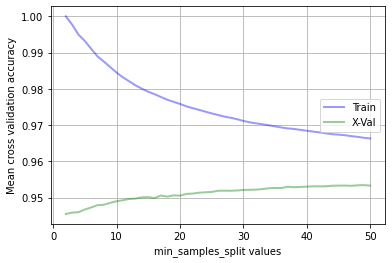

In [53]:
dt = tree.DecisionTreeClassifier()

param_range = range(2,51)

train_scores, test_scores = calc_params(X_train_s, y_train, dt, param_range, 'min_samples_split', 5)

max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("\nBest Score {:.3f} for parameter value".format(test_scores[max_at]), [*param_range][max_at])

### min_samples_leaf

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
* If int, then consider min_samples_leaf as the minimum number.
* If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.


Optimization progress for paramter min_samples_leaf (out of 50)
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 
Best Score 0.952 for parameter value 11


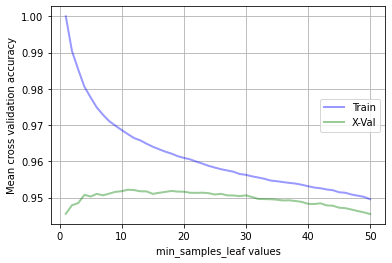

In [41]:
dt = tree.DecisionTreeClassifier()

param_range = range(1,51)

train_scores, test_scores = calc_params(X_train_s, y_train, dt, param_range, 'min_samples_leaf', 5)

max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("\nBest Score {:.3f} for parameter value".format(test_scores[max_at]), [*param_range][max_at])

### max_leaf_nodes

Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

Optimization progress for paramter max_leaf_nodes (out of 200)
180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
Best Score 0.956 for parameter value 190


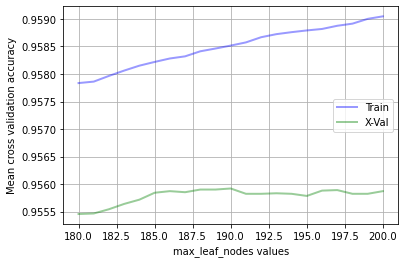

In [42]:
dt = tree.DecisionTreeClassifier()

param_range = range(180,201)

train_scores, test_scores = calc_params(X_train_s, y_train, dt, param_range, 'max_leaf_nodes', 5)

max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("\nBest Score {:.3f} for parameter value".format(test_scores[max_at]), [*param_range][max_at])

In [37]:
say('The task is complete.')

In [73]:
dt = tree.DecisionTreeClassifier()

# parameter values to be optimized for
parameters = {
    'max_depth': [*range(10, 21)],
    'min_samples_split' : [*range(40, 51)],
    'min_samples_leaf' : [*range(7, 18)],
    'max_leaf_nodes' : [*range(187, 192)],
    'class_weight' : [None, 'balanced'],
    'criterion': ['entropy', 'gini']
}

# GridSearch finds the best combination of paramters
#tree_gs = GridSearchCV(dt, parameters, verbose=3, cv=3, scoring='accuracy', n_jobs=-1, return_train_score=False)
tree_gs = RandomizedSearchCV(dt, parameters, verbose=3, cv=3, n_iter=5000, scoring='accuracy', n_jobs=-1, return_train_score=False)

In [74]:
%time tree_gs.fit(X_train_s, y_train) # performs gridsearch
print(tree_gs.best_params_)
print("RMSE (test): {:.4f}".format(tree_gs.best_score_))

Fitting 3 folds for each of 5000 candidates, totalling 15000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

CPU times: user 58.2 s, sys: 14.3 s, total: 1min 12s
Wall time: 37min 14s
{'min_samples_split': 45, 'min_samples_leaf': 9, 'max_leaf_nodes': 190, 'max_depth': 20, 'criterion': 'entropy', 'class_weight': None}
RMSE (test): 0.9549


In [75]:
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [11]:
tree_gs.best_params_

NameError: name 'tree_gs' is not defined

In [10]:
dt = tree.DecisionTreeClassifier(min_samples_split=45, 
                                 min_samples_leaf=9, 
                                 max_leaf_nodes=190, 
                                 max_depth=20, 
                                 criterion='entropy', 
                                 class_weight=None)

dt.fit(X_train_s, y_train)
train_eval_score = dt.score(X_train_s, y_train)
test_eval_score = dt.score(X_test_s, y_test)

print("Evaluation scores Train {:.3f} Test {:.3f}".format(train_eval_score, test_eval_score))

Evaluation scores Train 0.958 Test 0.954


In [9]:
dt = tree.DecisionTreeClassifier(min_samples_split=49, 
                                 min_samples_leaf=11, 
                                 max_leaf_nodes=190, 
                                 max_depth=12, 
                                 criterion='entropy', 
                                 class_weight='balanced')

dt.fit(X_train_s, y_train)
train_eval_score = dt.score(X_train_s, y_train)
test_eval_score = dt.score(X_test_s, y_test)

print("Evaluation scores Train {:.3f} Test {:.3f}".format(train_eval_score, test_eval_score))

Evaluation scores Train 0.955 Test 0.952


In [76]:
measure_performance(X_test_s, y_test, tree_gs, show_confussion_matrix=True, show_classification_report=True)

Accuracy:0.954 

Classification report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14675
           1       0.97      0.93      0.95     11223

    accuracy                           0.95     25898
   macro avg       0.96      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898
 

Confussion matrix
[[14301   374]
 [  819 10404]] 



In [57]:
#def plot_important_features(model, feature_names):

feature_importances = dt.feature_importances_
p = feature_importances.argsort()
feature_names = feature_names[p]
feature_names

array(['Class_Eco Plus', 'Gender_Male', 'Gender_Female',
       'Departure Delay in Minutes', 'Class_Eco', 'Food and drink',
       'Ease of Online booking', 'Departure/Arrival time convenient',
       'Type of Travel_Personal Travel', 'Flight Distance',
       'On-board service', 'Arrival Delay in Minutes', 'Leg room service',
       'Cleanliness', 'Age', 'Customer Type_disloyal Customer',
       'Inflight service', 'Seat comfort', 'Baggage handling',
       'Gate location', 'Checkin service', 'Customer Type_Loyal Customer',
       'Class_Business', 'Inflight entertainment',
       'Type of Travel_Business travel', 'Inflight wifi service',
       'Online boarding'], dtype='<U33')

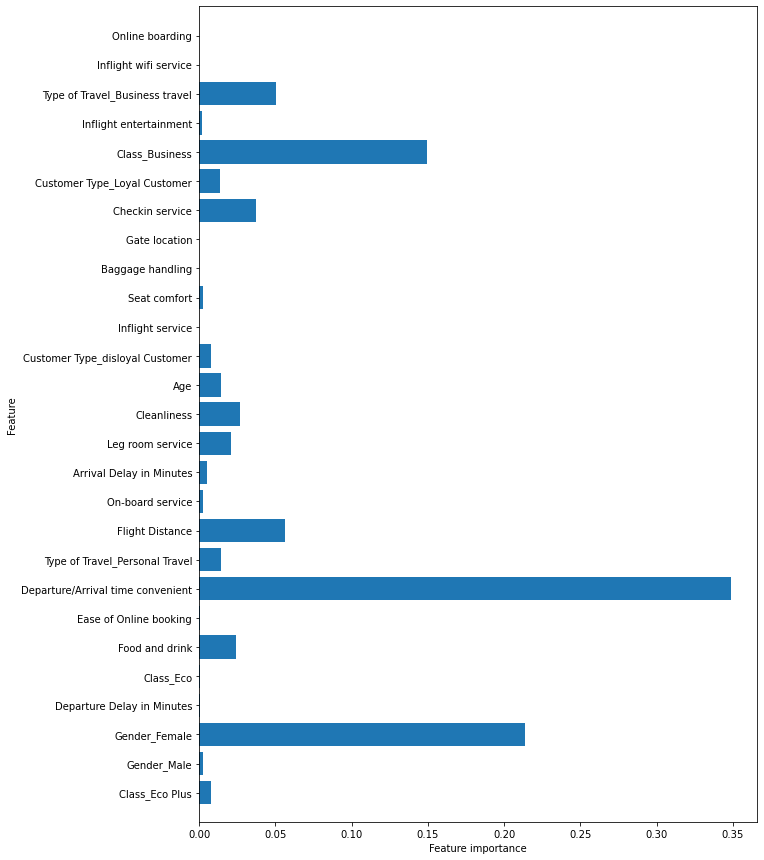

In [56]:
plot_important_features(dt, feature_names)

In [27]:

n_features = feature_names.shape[0]
plt.figure(figsize=(10,15))
plt.barh(range(n_features), feature_importances, align='center')

plt.yticks(np.arange(n_features), feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

plt.show()


(27,)